In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

In [20]:
import os
from urllib.request import urlretrieve
import pandas as pd

URL = 'https://data.seattle.gov/api/views/65db-xm6k/rows.csv?accessType=DOWNLOAD'

def get_fremont_data(filename='Fremont.csv', url=URL, force_download=False):
    if force_download or not os.path.exists(filename):
        urlretrieve(url, 'Fremont.csv')
    df = pd.read_csv('Fremont.csv', index_col='Date', parse_dates=True)
    df.columns = ['West', 'East']
    df['Total'] = df['West'] + df['East']
    return df

In [21]:
df = get_fremont_data()

In [3]:
!head Fremont.csv

Date,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
10/03/2012 12:00:00 AM,4,9
10/03/2012 01:00:00 AM,4,6
10/03/2012 02:00:00 AM,1,1
10/03/2012 03:00:00 AM,2,3
10/03/2012 04:00:00 AM,6,1
10/03/2012 05:00:00 AM,21,10
10/03/2012 06:00:00 AM,105,50
10/03/2012 07:00:00 AM,257,95
10/03/2012 08:00:00 AM,291,146


In [19]:
df.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 38640 entries, 2012-10-03 00:00:00 to 2017-02-28 23:00:00
Data columns (total 2 columns):
Fremont Bridge West Sidewalk    38633 non-null float64
Fremont Bridge East Sidewalk    38633 non-null float64
dtypes: float64(2)
memory usage: 905.6 KB


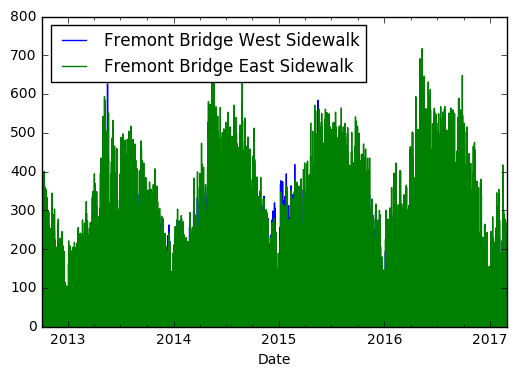

In [6]:
df.plot()

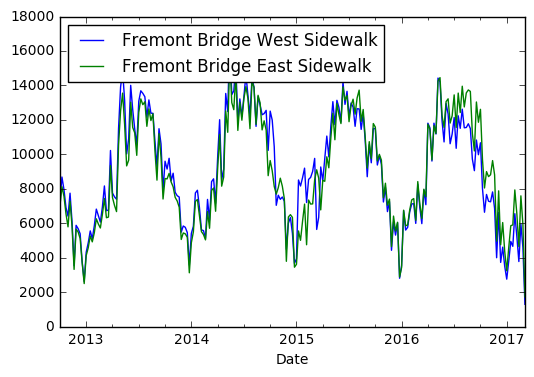

In [7]:
df.resample('W').sum().plot();

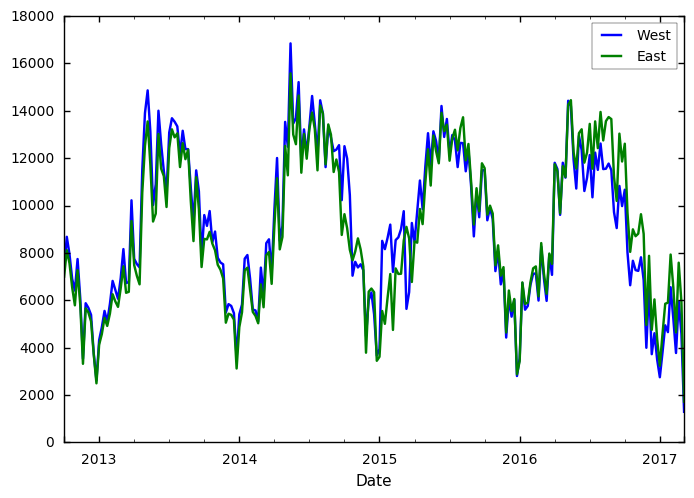

In [8]:
plt.figure(figsize=(15,8))
plt.style.use('seaborn-notebook')
df.resample('W').sum().plot(); ## W = weekly 

In [9]:
plt.style.available 

['seaborn-whitegrid',
 'seaborn-muted',
 'seaborn-paper',
 'seaborn-dark-palette',
 'seaborn-pastel',
 'bmh',
 'seaborn-talk',
 'seaborn-poster',
 'seaborn-deep',
 'grayscale',
 'fivethirtyeight',
 'dark_background',
 'ggplot',
 'seaborn-darkgrid',
 'seaborn-dark',
 'seaborn-bright',
 'seaborn-ticks',
 'seaborn-notebook',
 'seaborn-white',
 'seaborn-colorblind',
 'classic']

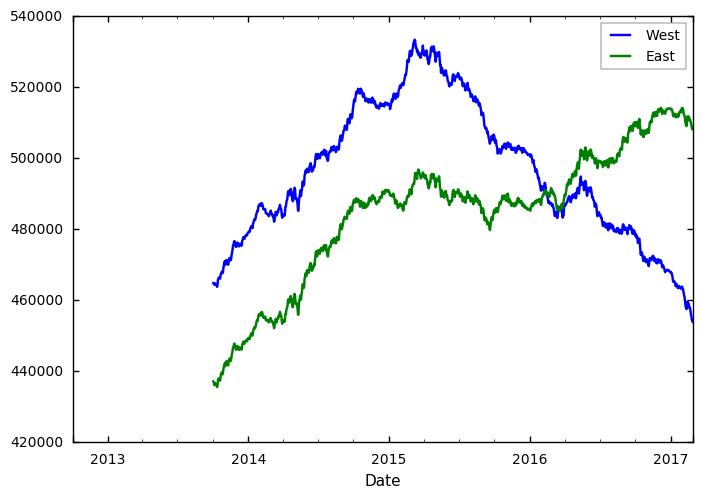

In [10]:
# annual trend 
df.resample('D').sum().rolling(365).sum().plot();

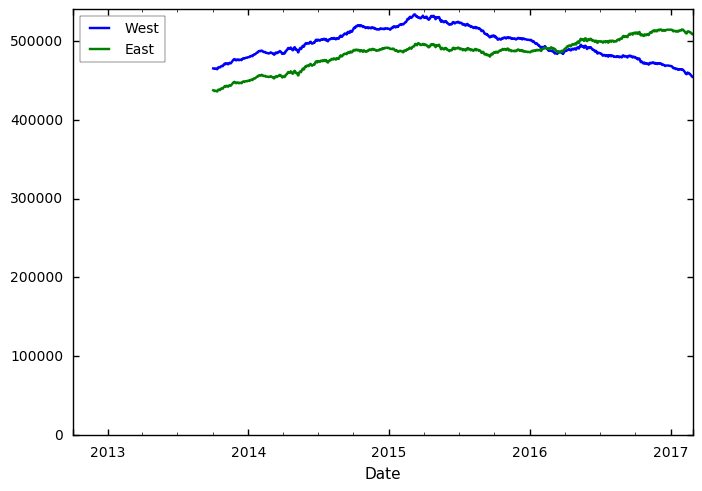

In [11]:
# annual trend 
ax = df.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

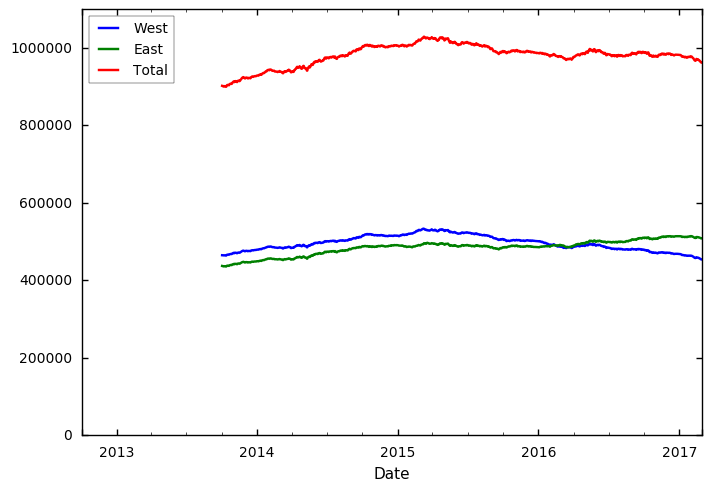

In [12]:
# annual trend 

ax = df.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0, None);

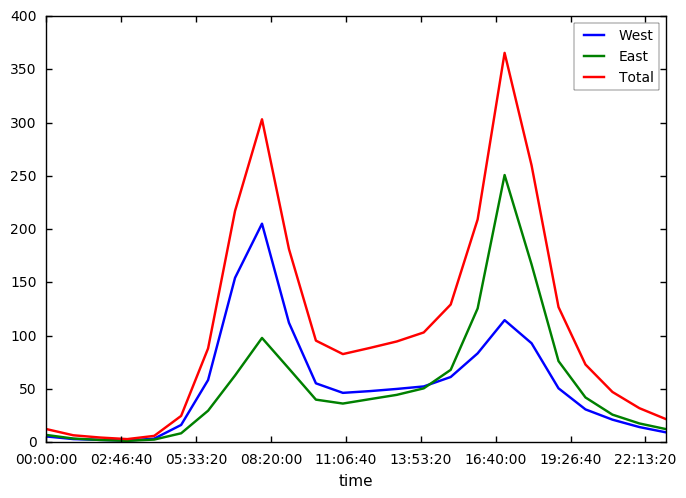

In [13]:
# individual trend per day
df.groupby(df.index.time).mean().plot()

In [14]:
pivoted = df.pivot_table('Total', index=df.index.time, columns=df.index.date)
pivoted.iloc[:5, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0


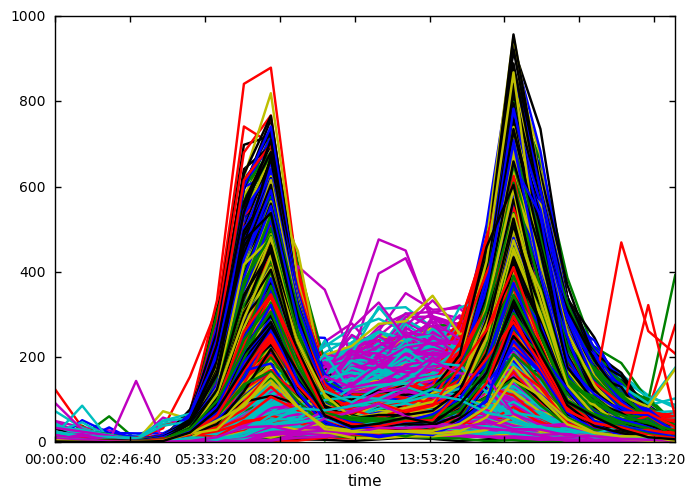

In [15]:
#there is a line for each day of 4 years
pivoted.plot(legend=False);

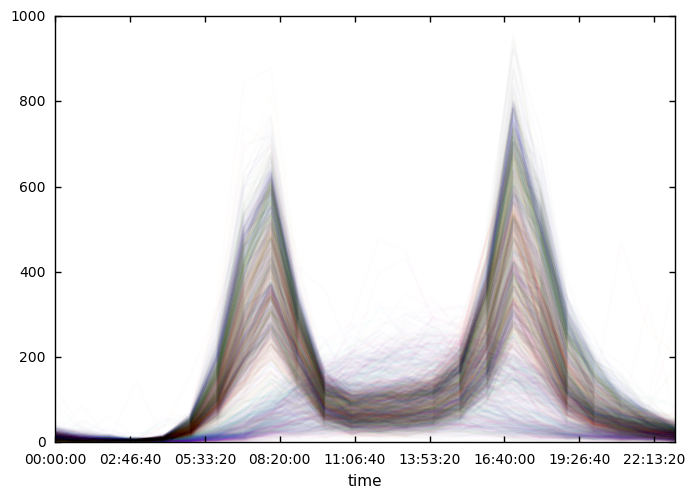

In [16]:
# how trend changes throughout in 4 years
pivoted.plot(legend=False, alpha= 0.01)